# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
   """Code Here
    建立你的神經網路
    """
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95 


In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料SGD
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0726 06:19:38.199439 140736021775232 deprecation_wrapper.py:119] From /Users/linyongcheng/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0726 06:19:38.205477 140736021775232 deprecation_wrapper.py:119] From /Users/linyongcheng/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0726 06:19:38.262552 140736021775232 deprecation_wrapper.py:119] From /Users/linyongcheng/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 06:19:38.265395 140736021775232 deprecation_wrapper.py:119] From /Users/linyongcheng/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.p

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0726 06:19:38.508023 140736021775232 deprecation.py:323] From /Users/linyongcheng/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3442 - acc: 0.1033 - val_loss: 2.3054 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3040 - acc: 0.1011 - val_loss: 2.3049 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3045 - acc: 0.1003 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3043 - acc: 0.0991 - val_loss: 2.3043 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3045 - acc: 0.0991 - val_loss: 2.3041 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3044 - acc: 0.0971 - val_loss: 2.3042 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3040 - acc: 0.0987 - val_loss: 2.3057 - 

Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6076 - acc: 0.4327 - val_loss: 1.7641 - val_acc: 0.3826
Epoch 3/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5118 - acc: 0.4641 - val_loss: 1.5688 - val_acc: 0.4455
Epoch 4/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.4525 - acc: 0.4837 - val_loss: 1.4755 - val_acc: 0.4814
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.3981 - acc: 0.5044 - val_loss: 1.4590 - val_acc: 0.4716
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.3631 - acc: 0.5156 - val_loss: 1.4726 - val_acc: 0.4775
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.3205 - acc: 0.5275 - val_loss: 1.4049 - val_acc: 0.5062
Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2887 - acc: 0.5418 - val_loss: 1.3805 - val_acc: 0.5088
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 118us/step - loss: 1.7136 - acc: 0.4005 - val_loss: 1.6857 - val_acc: 0.4092
Epoch 4/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6558 - acc: 0.4207 - val_loss: 1.6465 - val_acc: 0.4210
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.6095 - acc: 0.4356 - val_loss: 1.5961 - val_acc: 0.4402
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5697 - acc: 0.4508 - val_loss: 1.5784 - val_acc: 0.4439
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5376 - acc: 0.4619 - val_loss: 1.5639 - val_acc: 0.4456
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5089 - acc: 0.4714 - val_loss: 1.5292 - val_acc: 0.4616
Epoch 9/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4826 - acc: 0.4789 - val_loss: 1.5135 - val_acc: 0.4619
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 122us/step - loss: 1.9843 - acc: 0.3011 - val_loss: 1.9589 - val_acc: 0.3173
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9416 - acc: 0.3182 - val_loss: 1.9239 - val_acc: 0.3268
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9097 - acc: 0.3295 - val_loss: 1.8969 - val_acc: 0.3419
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8850 - acc: 0.3404 - val_loss: 1.8751 - val_acc: 0.3465
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8651 - acc: 0.3465 - val_loss: 1.8570 - val_acc: 0.3522
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8480 - acc: 0.3534 - val_loss: 1.8414 - val_acc: 0.3568
Epoch 10/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8331 - acc: 0.3593 - val_loss: 1.8280 - val_acc: 0.3611
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 6s 116us/step - loss: 2.2069 - acc: 0.1913 - val_loss: 2.1963 - val_acc: 0.1957
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1898 - acc: 0.2042 - val_loss: 2.1806 - val_acc: 0.2080
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.1746 - acc: 0.2171 - val_loss: 2.1663 - val_acc: 0.2182
Epoch 8/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1607 - acc: 0.2257 - val_loss: 2.1534 - val_acc: 0.2294
Epoch 9/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1478 - acc: 0.2362 - val_loss: 2.1412 - val_acc: 0.2362
Epoch 10/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1357 - acc: 0.2417 - val_loss: 2.1296 - val_acc: 0.2454
Epoch 11/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.1243 - acc: 0.2477 - val_loss: 2.1188 - val_acc: 0.2506
Epoch 12/50
50000/50000 [==================

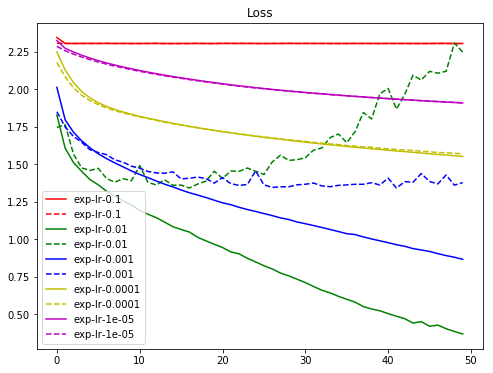

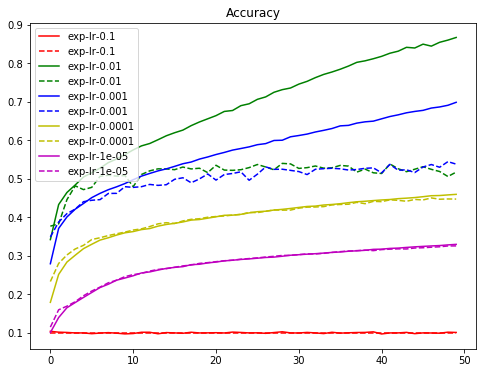

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 129us/step - loss: 14.4369 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.4982 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 7s 131us/step - loss: 14.4501 - acc: 0.0993 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5002 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5248 - acc: 0.0988 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 7s 132us/step - loss: 14.4330 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 7s 132us/step - loss: 14.4412 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

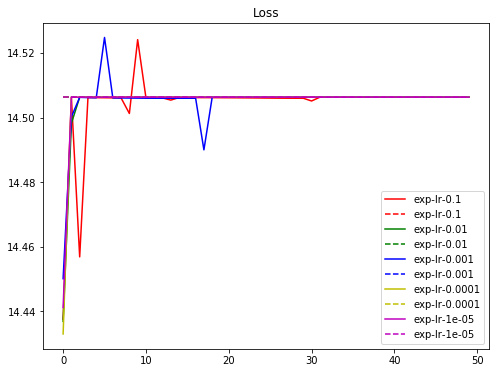

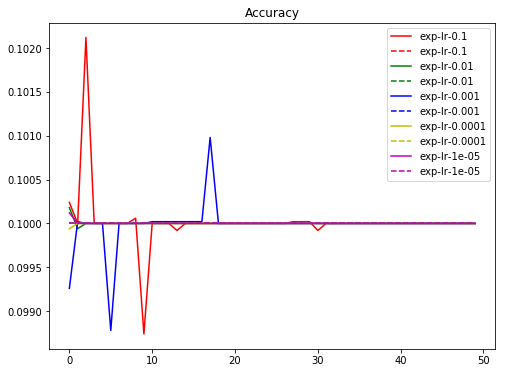

In [15]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料Adagrad
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-06)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.3321 - acc: 0.2174 - val_loss: 2.0761 - val_acc: 0.2269
Epoch 2/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8917 - acc: 0.3189 - val_loss: 1.8802 - val_acc: 0.3139
Epoch 3/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7908 - acc: 0.3613 - val_loss: 1.7434 - val_acc: 0.3691
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.7076 - acc: 0.3861 - val_loss: 1.8185 - val_acc: 0.3374
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6559 - acc: 0.4073 - val_loss: 1.8921 - val_acc: 0.3312
Epoch 6/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6097 - acc: 0.4261 - val_loss: 1.8303 - val_acc: 0.3669
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5680 - acc: 0.4395 - val_loss: 1.6597 - 

50000/50000 [==============================] - 7s 147us/step - loss: 2.3505 - acc: 0.2144 - val_loss: 1.9862 - val_acc: 0.2621
Epoch 2/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.8838 - acc: 0.3178 - val_loss: 1.8535 - val_acc: 0.3160
Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.7775 - acc: 0.3611 - val_loss: 1.8137 - val_acc: 0.3591
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7062 - acc: 0.3870 - val_loss: 1.7777 - val_acc: 0.3672
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6549 - acc: 0.4085 - val_loss: 1.7508 - val_acc: 0.3739
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6072 - acc: 0.4239 - val_loss: 1.6712 - val_acc: 0.3877
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5692 - acc: 0.4385 - val_loss: 1.6292 - val_acc: 0.4113
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 139us/step - loss: 1.8883 - acc: 0.3185 - val_loss: 1.7788 - val_acc: 0.3574
Epoch 3/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7842 - acc: 0.3576 - val_loss: 1.7727 - val_acc: 0.3612
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.7076 - acc: 0.3904 - val_loss: 1.7838 - val_acc: 0.3725
Epoch 5/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6542 - acc: 0.4089 - val_loss: 1.7331 - val_acc: 0.3887
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6095 - acc: 0.4252 - val_loss: 1.6570 - val_acc: 0.4017
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5707 - acc: 0.4378 - val_loss: 1.5647 - val_acc: 0.4483
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5307 - acc: 0.4538 - val_loss: 1.6451 - val_acc: 0.4185
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 137us/step - loss: 1.7942 - acc: 0.3597 - val_loss: 1.7213 - val_acc: 0.3901
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.7208 - acc: 0.3834 - val_loss: 1.7361 - val_acc: 0.3715
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6578 - acc: 0.4076 - val_loss: 1.7368 - val_acc: 0.3826
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6148 - acc: 0.4227 - val_loss: 1.8710 - val_acc: 0.3418
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5714 - acc: 0.4402 - val_loss: 1.5842 - val_acc: 0.4288
Epoch 8/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5383 - acc: 0.4508 - val_loss: 1.5824 - val_acc: 0.4226
Epoch 9/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5026 - acc: 0.4640 - val_loss: 1.6200 - val_acc: 0.4370
Epoch 10/50
50000/50000 [====================

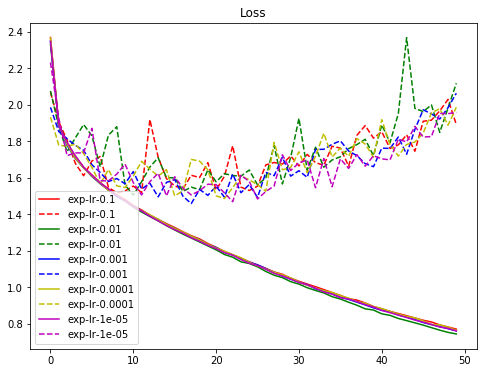

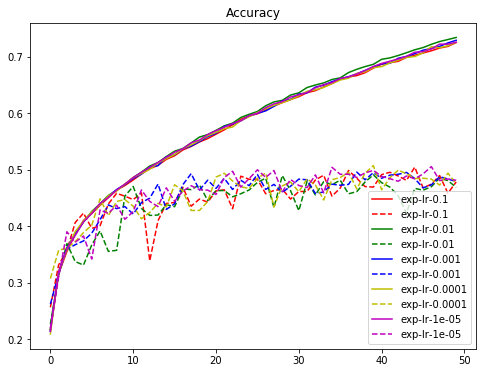

In [18]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料RMSprop
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clipnorm=clipnorm, clipvalue=clipvalue)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.9598 - acc: 0.2947 - val_loss: 1.7751 - val_acc: 0.3716
Epoch 2/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.7123 - acc: 0.3845 - val_loss: 1.6405 - val_acc: 0.4144
Epoch 3/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6251 - acc: 0.4194 - val_loss: 1.6036 - val_acc: 0.4260
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5585 - acc: 0.4428 - val_loss: 1.5206 - val_acc: 0.4570
Epoch 5/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5105 - acc: 0.4614 - val_loss: 1.5255 - val_acc: 0.4562
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.4702 - acc: 0.4752 - val_loss: 1.5086 - val_acc: 0.4700
Epoch 7/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.4416 - acc: 0.4887 - val_loss: 1.4762 - 

Epoch 2/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.6921 - acc: 0.3939 - val_loss: 1.6150 - val_acc: 0.4265
Epoch 3/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.6035 - acc: 0.4269 - val_loss: 1.5808 - val_acc: 0.4335
Epoch 4/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5390 - acc: 0.4507 - val_loss: 1.5216 - val_acc: 0.4587
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.4901 - acc: 0.4670 - val_loss: 1.4716 - val_acc: 0.4753
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.4544 - acc: 0.4845 - val_loss: 1.5006 - val_acc: 0.4676
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.4251 - acc: 0.4892 - val_loss: 1.4373 - val_acc: 0.4918
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.3937 - acc: 0.5024 - val_loss: 1.4315 - val_acc: 0.4905
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 159us/step - loss: 1.6151 - acc: 0.4268 - val_loss: 1.5867 - val_acc: 0.4373
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5532 - acc: 0.4468 - val_loss: 1.5462 - val_acc: 0.4542
Epoch 5/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4998 - acc: 0.4630 - val_loss: 1.5156 - val_acc: 0.4644
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4627 - acc: 0.4780 - val_loss: 1.5280 - val_acc: 0.4590
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.4396 - acc: 0.4862 - val_loss: 1.4628 - val_acc: 0.4798
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3998 - acc: 0.5000 - val_loss: 1.4842 - val_acc: 0.4738
Epoch 9/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.3820 - acc: 0.5074 - val_loss: 1.5012 - val_acc: 0.4664
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 166us/step - loss: 1.5595 - acc: 0.4437 - val_loss: 1.5293 - val_acc: 0.4554
Epoch 5/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5087 - acc: 0.4615 - val_loss: 1.5178 - val_acc: 0.4640
Epoch 6/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4706 - acc: 0.4737 - val_loss: 1.5323 - val_acc: 0.4617
Epoch 7/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4376 - acc: 0.4892 - val_loss: 1.5180 - val_acc: 0.4560
Epoch 8/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.4220 - acc: 0.4931 - val_loss: 1.4587 - val_acc: 0.4840
Epoch 9/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3868 - acc: 0.5072 - val_loss: 1.4386 - val_acc: 0.4855
Epoch 10/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3521 - acc: 0.5168 - val_loss: 1.4206 - val_acc: 0.4955
Epoch 11/50
50000/50000 [===================

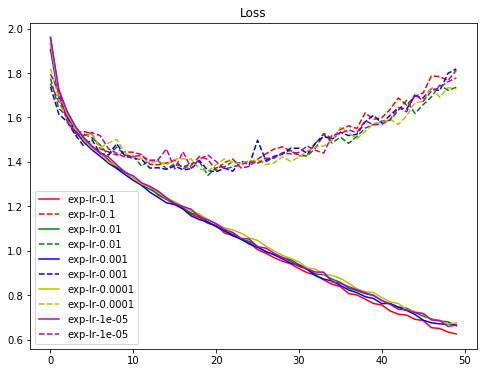

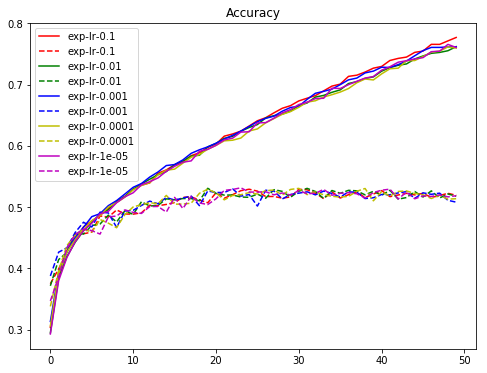

In [20]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料Adam
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()